The following refers to Fig 1.5 in the emdw devguide.pdf. We have two Dirichlets $\phi_0$ and $\phi_1$, as well as a latent variable $Z$, determining the probabilities of $p(Y|Z, \phi_0, \phi_1)$. The value of $Z\in\{0,1\}$ picks out which one of these Dirichlets to apply as prior for the probabilities of $Y$. In addition we also include a $p(X|Y)$ which can alter the probabilities of $Y$.

In [3]:
# defining and importing stuff
%matplotlib inline 
import numpy as np
import scipy as sc
from matplotlib import pylab as plt
from scipy.special import gamma


The following contains the tweakable parameters you can play with.  
1) The 'b0' and 'b1' arrays contain the conditional $\beta$ values for the ConditionalDirichlet prior - determining the message from the ConditionalDirichlet towards the ConditionalPolya, describing the probabilities $P(Y=y|X=x,\phi_x)$.  
2) The 'pY' array contains the distribution over $Y$ assumed to be passed back from beyond the ConditionalPolya towards the ConditionalPolya.  


In [8]:
# distribution (incoming from left) p(theta;alpha)
b0 = np.array([0.8, 1.2])
b1 = np.array([3.1, 0.9])

#distribution governing the latent variable Z
pZ = np.array([0.3, 0.7])

# distribution (incoming from top) p(X=1|Y)
pY = np.array([0.1, 0.6])/0.7

# normalisation, don't touch
c0 = gamma(np.sum(b0))/np.prod(gamma(b0))
c1 = gamma(np.sum(b1))/np.prod(gamma(b1))

# linear sampling of the probs phi0 and phi1
q1 = np.linspace(1E-5,1.-1E-5,1000)
q0 = 1. - q1


UP TILL HERE For reference, lets first get the message originally sent by the Conditional
Dirichlet cluster


area0= 1.001408987194118
area1= 1.000663884722522


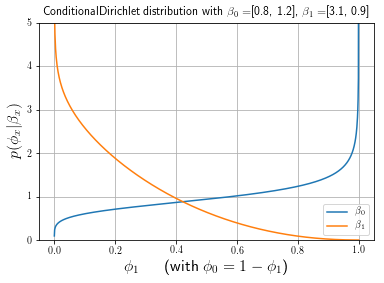

In [4]:
# the dirichlet distribution
f0 = c0*np.power(q0,b0[0]-1.)*(np.power(q1,b0[1]-1.))
f1 = c1*np.power(q0,b1[0]-1.)*(np.power(q1,b1[1]-1.))

#check it via numerical integration
area = sc.integrate.simps(f0, q1, dx=1, axis=-1, even='avg')
print('area0=',area)
#check it via numerical integration
area = sc.integrate.simps(f1, q1, dx=1, axis=-1, even='avg')
print('area1=',area)


# and plot it
plt.rc('text', usetex=True)
lbl0,=plt.plot(q1,f0, label=r'$\beta_0$')
lbl1,=plt.plot(q1,f1, label=r'$\beta_1$')
plt.xlabel(r'$\phi_1$ \hspace{5mm} (with $\phi_0 = 1-\phi_1$)',fontsize=16)
plt.ylabel(r'$p(\phi_x|\beta_x)$',
          fontsize=16)
plt.title(r'ConditionalDirichlet distribution with $\beta_0=$[%s, %s], $\beta_1=$[%s, %s]'%(b0[0],b0[1],b1[0],b1[1]))
plt.legend(handles=[lbl0, lbl1])
plt.grid()
plt.ylim((0,5))
#plt.savefig('dirich.png')
plt.show()


Let us now figure out what $P(X,{\phi}_{\mathsf{x}}|Y=1)$ should look like. 


area0= 0.40095653885920707
area1= 0.5999997803439729
total= 1.00095631920318


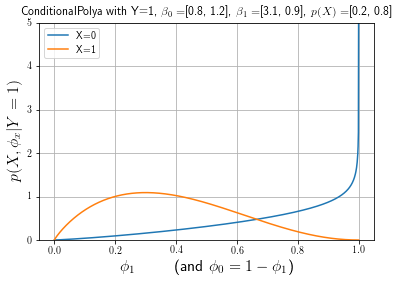

In [5]:
# the dirichlet distribution
fx0 = c0*pX[0]/dy*np.power(q0,b0[0]-1.)*(np.power(q1,b0[1]))
fx1 = c1*pX[1]/dy*np.power(q0,b1[0]-1.)*(np.power(q1,b1[1]))

#check it via numerical integration
area0 = sc.integrate.simps(fx0, q1, dx=1, axis=-1, even='avg')
print('area0=',area0)
area1 = sc.integrate.simps(fx1, q1, dx=1, axis=-1, even='avg')
print('area1=',area1)
print('total=',area0+area1)

# and plot it
x0,=plt.plot(q1,fx0, label='X=0')
x1,=plt.plot(q1,fx1, label='X=1')
plt.rc('text', usetex=True)
plt.xlabel(r'$\phi_1$ \hspace{1cm} (and $\phi_0 = 1-\phi_1$)',fontsize=16)
plt.ylabel(r'$p(X,\phi_x|Y=1)$',
          fontsize=16)
plt.title(r'ConditionalPolya with Y=1, $\beta_0=$[%s, %s], $\beta_1=$[%s, %s], $p(X)=$[%s, %s]'%(b0[0],b0[1],b1[0],b1[1],pX[0],pX[1]))
plt.legend(handles=[x0, x1])
plt.ylim((0,5))
plt.grid()
#plt.savefig('dirich.png')
plt.show()


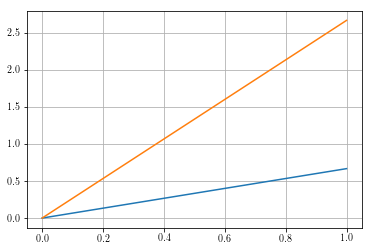

In [6]:
plt.plot(q1,fx0/f0)
plt.plot(q1,fx1/f1)
plt.grid()
plt.show()


X=0:  [0.8 1.6]
X=1:  [3.1 1.5]


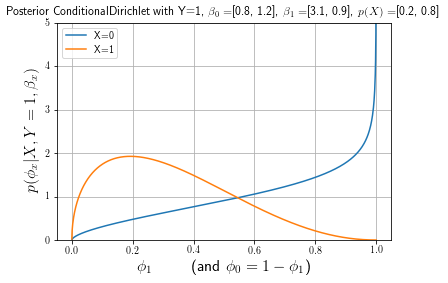

In [7]:
b0p = b0 + np.array([0,d0/dy])
b1p = b1 + np.array([0,d1/dy])
#b0p = b0 + np.array([0,1])
#b1p = b1 + np.array([0,1])

c0p = gamma(np.sum(b0p))/np.prod(gamma(b0p))
c1p = gamma(np.sum(b1p))/np.prod(gamma(b1p))

f0p = c0p*np.power(q0,b0p[0]-1.)*(np.power(q1,b0p[1]-1.))
f1p = c1p*np.power(q0,b1p[0]-1.)*(np.power(q1,b1p[1]-1.))

#plt.subplot(121)
print('X=0: ', b0p)
print('X=1: ', b1p)
x0,=plt.plot(q1,f0p, label='X=0')
x1,=plt.plot(q1,f1p, label='X=1')
plt.rc('text', usetex=True)
plt.xlabel(r'$\phi_1$ \hspace{1cm} (and $\phi_0 = 1-\phi_1$)',fontsize=16)
plt.ylabel(r'$p(\phi_x|X,Y=1,\beta_x)$',
          fontsize=16)
plt.title(r'Posterior ConditionalDirichlet with Y=1, $\beta_0=$[%s, %s], $\beta_1=$[%s, %s], $p(X)=$[%s, %s]'%(b0[0],b0[1],b1[0],b1[1],pX[0],pX[1]))
plt.legend(handles=[x0, x1])
plt.ylim((0,5))
plt.grid()
plt.show()

#plt.subplot(122)
#plt.plot(q1,fx0/(d0/dy))
#plt.plot(q1,fx1/(d1/dy))
#plt.ylim((0,5))
#plt.grid()
#plt.show()
